In [44]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [45]:
# 1. Load Dataset

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake["label"] = 0   # Fake News
true["label"] = 1   # Real News

data = pd.concat([fake, true])
data = data.sample(frac=1).reset_index(drop=True)

In [46]:
# 2. Text Cleaning Function

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

data["text"] = data["text"].apply(clean_text)


In [47]:
# 3. Split Data

X = data["text"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [48]:
# 4. TF-IDF Vectorization

vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [49]:
# 5. Logistic Regression Model

model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [50]:
# 6. Evaluation

y_pred = model.predict(X_test_vec)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9831625835189309

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5868
           1       0.98      0.98      0.98      5357

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



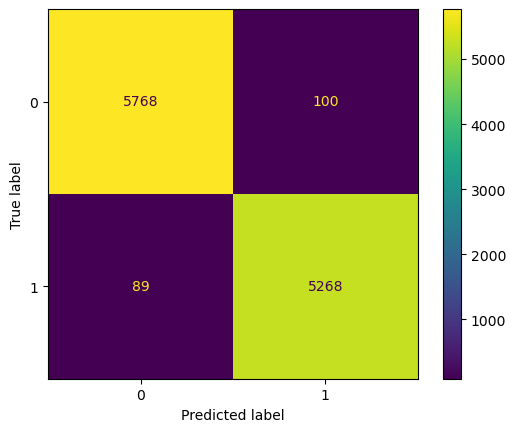

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [52]:
#7. Manual Testing

def predict_news(news):
    news = clean_text(news)
    news_vec = vectorizer.transform([news])
    prediction = model.predict(news_vec)
    return "REAL NEWS 🟢" if prediction[0] == 1 else "FAKE NEWS OR REAL NEWS"

print("\nEnter News Article In Text:")
sample_news = "Government announces new education policy for students"
print(sample_news)
print("Prediction:", predict_news(sample_news))


Enter News Article In Text:
Government announces new education policy for students
Prediction: FAKE NEWS OR REAL NEWS
